In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
import scipy
import seaborn as sns
import itertools

# Using lemonade.csv dataset and focusing on continuous variables:

In [5]:
df = pd.read_csv("lemonade.csv")

In [6]:
df.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [8]:
list(itertools.product(['Price','Temperature'], ['50%', 'mean']))

[('Price', '50%'),
 ('Price', 'mean'),
 ('Temperature', '50%'),
 ('Temperature', 'mean')]

In [9]:
# check out the stats with a .describe()
df.groupby('Sales').describe()[list(itertools.product(['Price','Temperature', 'Rainfall'], ['50%', 'mean']))].head()

Price      Temperature            Rainfall          
        50% mean         50%       mean      50%      mean
Sales                                                     
7       0.5  0.5        15.1  15.100000     2.50  2.500000
10      0.5  0.5        24.5  24.500000     1.91  1.910000
11      0.5  0.5        28.3  28.300000     1.68  1.680000
12      0.5  0.5        31.1  30.850000     1.54  1.545000
13      0.5  0.5        30.9  31.677778     1.43  1.456667

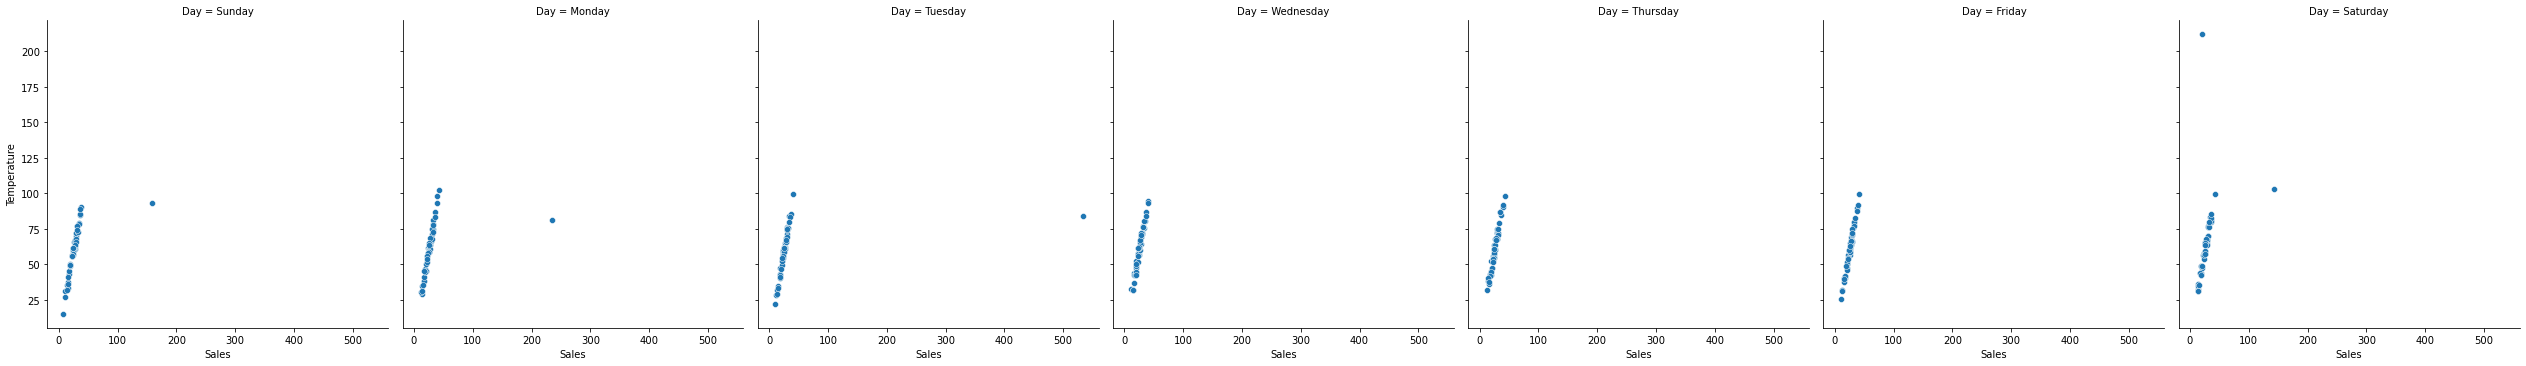

In [10]:
sns.relplot(x='Sales', y='Temperature', col='Day', data=df)

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?



# Should certain outliers be kept or removed?



# Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [11]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [12]:
get_lower_and_upper_bounds(df.Rainfall)

# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [14]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [15]:
outliers['Temperature'].keys()

dict_keys(['bounds', 'df'])

In [16]:
outliers['Temperature']['df']

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [17]:
[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~
 Temperature :
        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21

~~~~~~~~~~
 Rainfall :
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7

~~~~~~~~~~
 Flyers :
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20

~~~~~~~~~~
 Price :
 Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

~~~~~~~~~~
 Sales :
        Date       Day  Temperature  Rainfall  Flyers  Price  Sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51

[None, None, None, None, None]

In [18]:
df.describe()

# at a multiplier of 3:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], mult=3.0)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------
 Lower bound for z_score_rainfall : -3.4903489384324433
 Upper bound for z_score_rainfall: 3.1546480517967437

-----------------


In [19]:
[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~
 Temperature :
        Date       Day  Temperature  Rainfall  Flyers  Price  Sales  \
41  2/11/17  Saturday        212.0      0.91      35    0.5     21   

    z_score_rainfall  
41          0.306792  

~~~~~~~~~~
 Rainfall :
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales  \
0      1/1/17   Sunday         27.0      2.00      15    0.5     10   
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10   
343  12/10/17   Sunday         31.3      1.82      15    0.5     11   
364  12/31/17   Sunday         15.1      2.50       9    0.5      7   

     z_score_rainfall  
0            4.286488  
338          3.629291  
343          3.629291  
364          6.112037  

~~~~~~~~~~
 Flyers :
 Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales, z_score_rainfall]
Index: []

~~~~~~~~~~
 Price :
 Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales, z_score_rainfall]
Index: []

~~~~~~~~~~
 Sales 

[None, None, None, None, None, None]

In [ ]:
# things we will need to address/investigate:
# extreme temperature error value
# negative flyer error value
# 

In [ ]:
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

In [ ]:
df.head()

In [ ]:
df[df.z_score_rainfall.abs() > 3]

In [ ]:
df[df.Flyers < 0] 

In [ ]:
df.loc['2017-11-19':'2017-11-23']

In [ ]:
df['Flyers'] = df['Flyers'].abs()

In [ ]:
df['Flyers'].hist()

In [ ]:
df[df['Temperature'] > 200]

In [ ]:
df.loc['2017-02-08': '2017-02-13']

In [ ]:
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']

In [ ]:
df.loc['2017-02-11']

In [ ]:
df[df['Temperature'] > 200]


~~~~~~~~~~
 Temperature :
          Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41    2/11/17  Saturday        212.0      0.91      35    0.5     21
364  12/31/17    Sunday         15.1      2.50       9    0.5      7

~~~~~~~~~~
 Rainfall :
          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2   

KeyError: '2017-02-10'

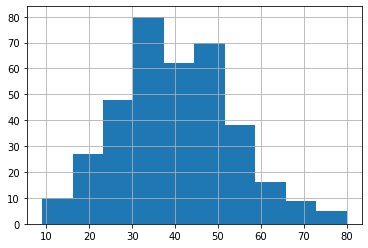

In [13]:
df.describe()

# Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

# Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

# Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

# Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

# Use a 2 sigma decision rule to isolate the outliers.

# Do these make sense?

# Should certain outliers be kept or removed?

# Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv